# Reading a dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("/Users/joudsi/Desktop/17.07.19/subdata_bb_norm_clustered.csv")

In [3]:
data.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.558335,0.0,0.420142,0.538685,0.607481,0.713859,0.903968,0.346149,0.452554,...,0.466246,0.142273,0.041618,0.820529,0.065721,0.014585,0.035408,0.026851,4,0
1,1,0.967606,0.0,0.251775,0.467465,0.728568,0.684853,0.905051,0.322675,0.400575,...,0.466246,0.142273,0.007797,0.555009,0.170775,0.030103,0.073783,0.046379,1,0
2,2,0.908553,0.0,0.201747,0.473796,0.747566,0.580397,0.988272,0.180286,0.388677,...,0.466246,0.142273,0.041618,0.414874,0.312547,0.010027,0.028165,0.314890,1,0
3,3,0.585965,0.0,0.287335,0.281486,0.415570,0.588939,0.950327,0.240689,0.301600,...,0.238095,0.142273,0.224172,0.385372,0.154593,0.043756,0.126073,0.146461,3,0
4,4,0.545732,1.0,0.424039,0.365803,0.367042,0.706385,0.954789,0.324970,0.388354,...,0.466246,0.142273,0.041618,0.414054,0.128454,0.026740,0.059371,0.063466,2,0


In [7]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '5997')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 30 columns):
Unnamed: 0          5997 non-null int64
amdission_age       5997 non-null float64
gender              5997 non-null float64
heartrate_mean      5997 non-null float64
meanbp_mean         5997 non-null float64
sysbp_mean          5997 non-null float64
tempc_mean          5997 non-null float64
spo2_mean           5997 non-null float64
resprate_mean       5997 non-null float64
diasbp_mean         5997 non-null float64
creatinine_mean     5997 non-null float64
potassium_mean      5997 non-null float64
sodium_mean         5997 non-null float64
chloride_mean       5997 non-null float64
bicarbonate_mean    5997 non-null float64
hematocrit_mean     5997 non-null float64
wbc_mean            5997 non-null float64
glucose_mean        5997 non-null float64
lactate_mean        5997 non-null float64
aniongap_mean       5997 non-null float64
albumin_mean        5997 non-null float64
bands_mean   

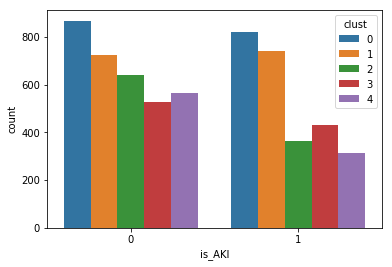

In [9]:
sns.countplot(x="is_AKI", hue="clust",data=data)

In [43]:
clust0 = data[data['clust'] == 0]
clust1 = data[data['clust'] == 1]
clust2 = data[data['clust'] == 2]
clust3 = data[data['clust'] == 3]
clust4 = data[data['clust'] == 4]


In [47]:
print(clust0.shape)
print(clust1.shape)
print(clust2.shape)
print(clust3.shape)
print(clust4.shape)

(1691, 30)
(1466, 30)
(1003, 30)
(960, 30)
(877, 30)


In [62]:
X0 = clust0.drop("is_AKI", axis=1)
X0 = X0.drop("clust", axis=1)
Y0 = clust0["is_AKI"]

X1 = clust1.drop("is_AKI", axis=1)
X1 = X1.drop("clust", axis=1)
Y1 = clust1["is_AKI"]

X2 = clust2.drop("is_AKI", axis=1)
X2 = X2.drop("clust", axis=1)
Y2 = clust2["is_AKI"]

X3 = clust3.drop("is_AKI", axis=1)
X3 = X3.drop("clust", axis=1)
Y3 = clust3["is_AKI"]

X4 = clust4.drop("is_AKI", axis=1)
X4 = X4.drop("clust", axis=1)
Y4 = clust4["is_AKI"]

print(X0.shape)
print(Y0.shape)

print(X1.shape)
print(Y1.shape)

print(X2.shape)
print(Y2.shape)

print(X3.shape)
print(Y3.shape)

print(X4.shape)
print(Y4.shape)


(1691, 28)
(1691,)
(1466, 28)
(1466,)
(1003, 28)
(1003,)
(960, 28)
(960,)
(877, 28)
(877,)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [81]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,Y0, test_size=0.3, random_state=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size=0.3, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.3, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,Y3, test_size=0.3, random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,Y4, test_size=0.3, random_state=1)

In [82]:
logmodel = LogisticRegression()

In [83]:
logmodel.fit(X0_train, y0_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
logmodel.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
logmodel.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
logmodel.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
logmodel.fit(X4_train, y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
predictions0 = logmodel.predict(X0_test)
predictions1 = logmodel.predict(X1_test)
predictions2 = logmodel.predict(X2_test)
predictions3 = logmodel.predict(X3_test)
predictions4 = logmodel.predict(X4_test)

In [89]:
from sklearn.metrics import classification_report

In [91]:
y0_test.shape

(508,)

In [90]:
classification_report(y0_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [508, 1800]

In [77]:
classification_report(y1_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [440, 1800]

In [78]:
classification_report(y2_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [301, 1800]

In [79]:
classification_report(y3_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [288, 1800]

In [80]:
classification_report(y4_test, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [264, 1800]

In [92]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, predictions)

array([[802, 203],
       [424, 371]])

In [93]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, predictions)

0.6516666666666666